# Explore and visualize construction permits

> * 🔬 Data Science
* 📈 Statistics
* 👟 Ready To Run!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1">Overview</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-2">Explore the data</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.1">Data Exploration</a></span></li></ul></li><li><span><a href="#Permits-by-Status" data-toc-modified-id="Permits-by-Status-3">Permits by Status</a></span></li><li><span><a href="#Permits-by-Type" data-toc-modified-id="Permits-by-Type-4">Permits by Type</a></span><ul class="toc-item"><li><span><a href="#Clean-up-the-data" data-toc-modified-id="Clean-up-the-data-4.1">Clean up the data</a></span></li><li><span><a href="#Filter-the-permits" data-toc-modified-id="Filter-the-permits-4.2">Filter the permits</a></span></li><li><span><a href="#Visualize-filtered-dataset" data-toc-modified-id="Visualize-filtered-dataset-4.3">Visualize filtered dataset</a></span></li></ul></li><li><span><a href="#Visualize-temporal-and-spatial-trends" data-toc-modified-id="Visualize-temporal-and-spatial-trends-5">Visualize temporal and spatial trends</a></span><ul class="toc-item"><li><span><a href="#Visualize-permits-by-time-of-issue" data-toc-modified-id="Visualize-permits-by-time-of-issue-5.1">Visualize permits by time of issue</a></span></li></ul></li></ul></div>

## Overview

One indicator of a region's growth is the number of permits issued for new construction. Exploring and analyzing permit activity can help regional planners ensure that development occurs in accordance to the area's long-term goals. One area that has recently experienced rapid growth is Montgomery County, Maryland, a suburban county near Washington, D.C. County planners want to observe spatial and temporal growth trends, find out why certain areas are growing faster than others, and communicate key information about the county's growth to the public.

In this notebook, you'll explore Montgomery County permit data using the Pandas library. First, you'll add the permit data from ArcGIS Living Atlas of the World, then you'll become familiar with exactly what kind of information it contains. Then, you'll analyze the data to detect patterns and find out why and where growth is occurring. These patterns will be represented in maps and charts that you can share with fellow planners and the public to inform future decisions.

For another way to complete this workflow, try the Learn ArcGIS lesson, [Get Started with Insights for ArcGIS](https://learn.arcgis.com/en/projects/get-started-with-insights-for-arcgis/).

## Explore the data

To better understand trends in permit activity in Montgomery County, you'll add a dataset of permits issued since 2010. Before you begin visualizing the data, it's important to understand what the data contains. You'll familiarize yourself with the attributes and values.

First, you'll need to load a few of the libraries you'll use throughout the lesson.

In [1]:
from arcgis.gis import GIS
import pandas as pd

from arcgis.features import GeoAccessor, GeoSeriesAccessor

In order to access content and perform the mapping functions necessary, you must to be signed in to an ArcGIS organization. In the module below, replace the username and password with your account credentials. If necessary, you can also replace the domain.



In [2]:
agol_gis = GIS("https://www.arcgis.com", username="your_username", password="your_password")

The Montgomery County permit data has been published to ArcGIS Online. To access the content, you'll search for the **Commercial Permits since 2010** item. To get more specific results, you can specify the owner's name. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set the parameter `outside_org=True`.

<Item title:"Commercial Permits since 2010" type:Feature Layer Collection owner:rpeake_LearnGIS>
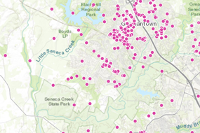

In [5]:
data = agol_gis.content.search(
    'title: Commercial Permits since 2010 owner: rpeake_LearnGIS',
    'Feature layer',
     outside_org=True)
data[0]

The first result is the Commercial Permits since 2010 item you want. To access this, create a variable that calls the Commercial Permits result from the Living Atlas.

In [6]:
permits = data[0]

The Commercial Permits item is a Feature Layer Collection, so calling the `layers` function gives you a list of FeatureLayer objects. The permit layer is the first layer in this item. To visualize this layer on a map of Montgomery County, Maryland, you'll create `permit_map` as a map item and add the permit layer data to it.

In [ ]:
permit_layer = permits.layers[0]

In [8]:
permit_map = agol_gis.map('Montgomery County, Maryland', zoomlevel=9)
permit_map

MapView(layout=Layout(height='400px', width='100%'), zoom=9.0)

You can add different layer objects to the map, including FeatureLayer, FeatureCollection, ImageryLayer, and MapImageLayer, by calling the `add_layer()` method.

In [10]:
permit_map.add_layer(permit_layer)

### Data Exploration

Now that you've added the permit data, you'll explore its contents. Geographic data doesn't only contain information about location; it can also include other attributes not seen on a map. 

To explore these attributes, you'll convert the layer into a spatial pandas dataframe.

In [11]:
permit_layer

<FeatureLayer url:"https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/Commercial_Permits_since_2010/FeatureServer/0">

In [12]:
from arcgis.features import SpatialDataFrame
sdf = SpatialDataFrame.from_layer(permit_layer)

Because this dataset contains several years worth of data, it is fairly large. Instead of viewing the entirety of the dataset at once, you can choose a small segment as an example. To see just the records at the end of the dataset, use the `tail()` method.

In [13]:
sdf.tail()

Added_Date             Address           Applicatio  BldgAreaNu  \
11219 2014-01-31      1015 SPRING ST  COMMERCIAL BUILDING      707.91   
11220 2014-02-11  26100 WOODFIELD RD  COMMERCIAL BUILDING        0.00   
11221 2014-02-20  10520 MONTROSE AVE  COMMERCIAL BUILDING      728.00   
11222 2014-03-06       8500 RIVER RD  COMMERCIAL BUILDING      472.02   
11223 2014-03-10       8500 RIVER RD  COMMERCIAL BUILDING     8461.55   

      Building_A           City  DeclValNu  DeclValNu2  Declared_V  \
11219     707.91  SILVER SPRING    42000.0     42000.0  $42,000.00   
11220          0       DAMASCUS     5875.0      5875.0   $5,875.00   
11221        728       BETHESDA    31000.0     31000.0  $31,000.00   
11222     472.02       BETHESDA     1000.0      1000.0   $1,000.00   
11223    8461.55       BETHESDA        1.0         1.0       $1.00   

                                              Descriptio  \
11219  Silver Spring Enterprise Zone\n\nAdd exterior ...   
11220                                         PYLON SIGN   
11221  Remodeling a one story building with walk-out ...   
11222  TOTAL OF 17 GROUPED TENTS FOR 2014 QUICKEN LOA...   
11223  1 GRANDSTAND & MULTIPLE PLATFORMS FOR 2014 QUI...   

                             ...                          Pre_direct State  \
11219                        ...                                        MD   
11220                        ...                                        MD   
11221                        ...                                        MD   
11222                        ...                                        MD   
11223                        ...                                        MD   

          Status Street_Nam  Street_Num Street_Suf  \
11219  Stop Work     SPRING        1015         ST   
11220  Stop Work  WOODFIELD       26100         RD   
11221  Stop Work   MONTROSE       10520        AVE   
11222  Stop Work      RIVER        8500         RD   
11223  Stop Work      RIVER        8500         RD   

                             Use_Code  Work_Type ZIP_code  \
11219               BUSINESS BUILDING        ADD    20910   
11220               BUSINESS BUILDING  CONSTRUCT    20872   
11221               ASSEMBLY BUILDING        ADD    20814   
11222  COMMERCIAL MISCELLANEOUS STRUC  CONSTRUCT    20817   
11223  COMMERCIAL MISCELLANEOUS STRUC  CONSTRUCT    20817   

                                                   SHAPE  
11219  {'x': -8574668.7047, 'y': 4721607.997599997, '...  
11220  {'x': -8594080.2264, 'y': 4762636.6635000035, ...  
11221  {'x': -8582314.4798, 'y': 4725770.635600001, '...  
11222  {'x': -8591206.0439, 'y': 4721680.315399997, '...  
11223  {'x': -8591206.0439, 'y': 4721680.315399997, '...  

[5 rows x 26 columns]

The permit data contains a long list of attributes that include information about the type, status, and value of the permits issued. Some attributes have self-explanatory names, while others may have names that can be difficult to understand without context. To see which attributes may be of interest to your visualization, you'll list them using the `columns` function.

In [14]:
sdf.columns

Index(['Added_Date', 'Address', 'Applicatio', 'BldgAreaNu', 'Building_A',
       'City', 'DeclValNu', 'DeclValNu2', 'Declared_V', 'Descriptio', 'FID',
       'Final_Date', 'Issue_Date', 'Location', 'Permit_Num', 'Post_direc',
       'Pre_direct', 'State', 'Status', 'Street_Nam', 'Street_Num',
       'Street_Suf', 'Use_Code', 'Work_Type', 'ZIP_code', 'SHAPE'],
      dtype='object')

For more information about the dataset, you can use the `describe` function to get a set of summary statistics. Adding the property 'T' will transpose the column titles so they are written as rows.

In [15]:
sdf.describe().T

count           mean           std       min        25%  \
BldgAreaNu  11224.0    9241.778777  3.950484e+04       0.0     255.00   
DeclValNu   11224.0  784736.035620  1.152229e+07       0.0   20000.00   
DeclValNu2  11224.0  784736.035620  1.152229e+07       0.0   20000.00   
FID         11224.0    5612.500000  3.240234e+03       1.0    2806.75   
Permit_Num  11224.0  655806.112794  7.759285e+04  528631.0  587437.50   
ZIP_code    11224.0   20848.988863  5.581882e+02       0.0   20832.00   

                 50%        75%           max  
BldgAreaNu    1537.0    4000.00  1.548205e+06  
DeclValNu    74000.0  200000.00  1.129634e+09  
DeclValNu2   74000.0  200000.00  1.129634e+09  
FID           5612.5    8418.25  1.122400e+04  
Permit_Num  652073.5  722003.25  7.961930e+05  
ZIP_code     20871.0   20901.00  2.177100e+04

While you've listed the attribute names already, it is also useful to know the type of each attribute. Attribute types determine how data can be analyzed and mapped. You'll query the types of attributes using the `dtypes` method.

In [16]:
sdf.dtypes

Added_Date    datetime64[ns]
Address               object
Applicatio            object
BldgAreaNu           float64
Building_A            object
City                  object
DeclValNu            float64
DeclValNu2           float64
Declared_V            object
Descriptio            object
FID                    int64
Final_Date    datetime64[ns]
Issue_Date    datetime64[ns]
Location              object
Permit_Num             int64
Post_direc            object
Pre_direct            object
State                 object
Status                object
Street_Nam            object
Street_Num            object
Street_Suf            object
Use_Code              object
Work_Type             object
ZIP_code               int64
SHAPE                 object
dtype: object

To get a better idea of the data in each attribute, you can call the `unique` function to list all the unique values in a column. One of the attributes you're interested in is Work_Type, which will show how many contruction projects are new or what improvements are being made to existing structures.

In [17]:
sdf['Work_Type'].unique()

array(['CONSTRUCT', 'ALTER', 'COMMERCIAL CHANGE OF USE',
       'RESTORE AND / OR REPAIR', 'ADD', 'BUILD FOUNDATION', 'INSTALL',
       'REPLACE', 'CONSTRUCT SHEETING/SHORING', 'FINAL ONLY AP',
       'REMOVE AND REPLACE', 'OCCUPY', 'DEMOLISH'], dtype=object)

In [18]:
sdf['Status'].unique()

array(['Finaled', 'Issued', 'Open', 'Stop Work'], dtype=object)

In [19]:
sdf['Use_Code'].unique()

array(['MULTI-FAMILY DWELLING', 'RESTAURANT', 'BUSINESS BUILDING',
       'MERCANTILE BUILDING', 'PLACE OF WORSHIP', 'ASSEMBLY BUILDING',
       'STORAGE BUILDING', 'GARAGE', 'INSTITUTIONAL BUILDING',
       'COMMERCIAL MISCELLANEOUS STRUC', 'INDUSTRIAL BUILDING',
       'EDUCATIONAL BUILDING', 'TOWER', 'SWIMMING POOL', 'FENCE', 'BANK',
       'SHED', 'MULTI-FAMILY SENIOR CITIZEN BL', 'RETAINING WALL',
       'TRAILER', 'HOSPITAL', 'BIOSCIENCE', 'TOWNHOUSE', 'HOTEL',
       'FACTORY', 'BOARDING HOUSE', 'SWIMMING POOL & FENCE',
       'UTILITY, MISCELLANEOUS', 'THEATER',
       'MULTIFAMILY DWELLING HIGH RISE', 'MULTIFAMILY DWELLING LOW RISE',
       'MISCELLANEOUS STRUCTURE', 'OWNERSHIP UNIT'], dtype=object)

## Permits by Status

As you saw above, the Status attribute indicates level of completion. There are four permit statuses: Finaled, Issued, Open, and Stop Work. To see how many projects fall under each category of completion, you can use the `groupby()` method. This method sums the records by attribute value.

In [20]:
permits_by_status = sdf.groupby(sdf['Status']).size()
permits_by_status

Status
Finaled      5341
Issued       4696
Open          757
Stop Work     430
dtype: int64

Now that you've calculated how many projects are in each stage, you'll visualize them in a pie chart. Many common visualizations can be done with either matplotlib or seaborn. You'll import and use matplotlib below.

In [21]:
% matplotlib inline
import matplotlib.pyplot as plt

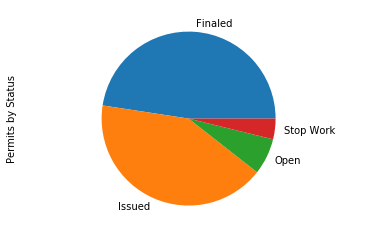

In [22]:
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='Permits by Status');

The pie chart you created shows how many permits are listed under each of the four statuses as a percent of the total number of permits. Most of the permits are either Issued or Finaled. Finaled permits are issued permits that have also had the requisite inspections performed.

It's helpful to visualize the spatial distribution of permit attributes on a map. You'll symbolize the map so that each permit's symbol represents its status using the argument `renderer_type='u'`. 

In [25]:
permits_by_status_map = agol_gis.map('Montgomery County, Maryland')
permits_by_status_map

MapView(layout=Layout(height='400px', width='100%'))

In [26]:
sdf.spatial.plot(kind='map', map_widget=permits_by_status_map,
        renderer_type='u', # specify the unique value renderer using its notation 'u'
        col='Status')  # column to get unique values from

True

## Permits by Type

It is also important to understand what types of permits have been issued to see what structures are being built where. As you did with permit status, you'll list sum the permits issued by type.

In [27]:
permits_by_type = sdf.groupby(['Use_Code']).size()
permits_by_type

Use_Code
ASSEMBLY BUILDING                  394
BANK                                87
BIOSCIENCE                          39
BOARDING HOUSE                       3
BUSINESS BUILDING                 3461
COMMERCIAL MISCELLANEOUS STRUC    1197
EDUCATIONAL BUILDING               658
FACTORY                              4
FENCE                               10
GARAGE                              56
HOSPITAL                           143
HOTEL                               44
INDUSTRIAL BUILDING                 53
INSTITUTIONAL BUILDING              30
MERCANTILE BUILDING               1016
MISCELLANEOUS STRUCTURE              9
MULTI-FAMILY DWELLING             1838
MULTI-FAMILY SENIOR CITIZEN BL      71
MULTIFAMILY DWELLING HIGH RISE      10
MULTIFAMILY DWELLING LOW RISE       31
OWNERSHIP UNIT                       1
PLACE OF WORSHIP                   167
RESTAURANT                         638
RETAINING WALL                     185
SHED                                28
STORAGE BUILDING

The series is not listed in any useful way. To sort permit types from highest to loweset, you can use the `sort()` method.

In [28]:
permits_by_type.sort_values(ascending=False, inplace=True)
permits_by_type.head()

Use_Code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
TOWNHOUSE                          680
dtype: int64

The most common use code, **Business Buildings**, has almost twice as many permits as the second highest, **Multi-family Dwelling**. The top four use codes together account for the majority of all permits, so you'll focus on these use codes in your visualizations.

### Clean up the data

Before visualizing or analyzing your data, it is advantageous to clean it. This process involves removing attributes you don't need, renaming fields with unclear names, and filtering the dataset to only show permits with the four most common use codes. These changes won't permanently affect the original dataset, but they will make the data easier to work with and understand.

First, you'll remove the **'Declared_V'**, **'Building_A'**, **'Applicatio'**  fields using the `drop` method. These fields describe aspects of the data that aren't important for your analysis.

In [29]:
sdf.drop(['Declared_V', 'Building_A', 'Applicatio'], axis=1, inplace=True)

To ensure that the intended attributs have been removed, you'll list the columns to check.

In [30]:
sdf.columns

Index(['Added_Date', 'Address', 'BldgAreaNu', 'City', 'DeclValNu',
       'DeclValNu2', 'Descriptio', 'FID', 'Final_Date', 'Issue_Date',
       'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status',
       'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type',
       'ZIP_code', 'SHAPE'],
      dtype='object')

The fields are no longer listed. Next, you'll rename some of the attribute fields with shortened or unclear names so that their names are more descriptive. To use the `rename` method, list the current attribute name followed by the desired name. Then, call the `columns` function again to ensure they've been renamed.

In [31]:
sdf.rename(columns={"Descriptio": "Description", "BldgAreaNu": "Building_Area", "DeclValNu": "Declared_Value"}, inplace=True)

In [32]:
sdf.columns

Index(['Added_Date', 'Address', 'Building_Area', 'City', 'Declared_Value',
       'DeclValNu2', 'Description', 'FID', 'Final_Date', 'Issue_Date',
       'Location', 'Permit_Num', 'Post_direc', 'Pre_direct', 'State', 'Status',
       'Street_Nam', 'Street_Num', 'Street_Suf', 'Use_Code', 'Work_Type',
       'ZIP_code', 'SHAPE'],
      dtype='object')

### Filter the permits

Next, you'll filter the permits to reduce the number of records in your visualization. As you saw previously, four types of permits make up over half the total number issued. Focusing on just these four types will reduce the amount of data to analyze without ignoring the most important types of development. To remove the other use codes, you'll create a filter.

First, list use the `head` function with the argument `(4)` to list the top four values in the permits_by_type variable you created earlier.

In [33]:
permits_by_type.head(4)

Use_Code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

From now on, you only want to use the filtered permit records, so you'll create the variable `filtered_permits` and add only the top four types to it.

In [34]:
filtered_permits = list(permits_by_type.head(4).index)
filtered_permits

['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING']

To visualize the top four permit types on a map, you'll apply the filter variable to the dataframe to drop all data that doesn't match the use codes listed in the filter. Double-check the filter's been applied by calling the `head` of the dataframe.

In [35]:
filtered_df = sdf.loc[sdf['Use_Code'].isin(filtered_permits)]

In [36]:
filtered_df.head()

Added_Date                     Address  Building_Area        City  \
0 2010-01-07  13536 WATERFORD HILLS BLVD         1336.0  GERMANTOWN   
1 2010-01-07  13538 WATERFORD HILLS BLVD         1730.0  GERMANTOWN   
2 2010-01-07  13540 WATERFORD HILLS BLVD         1336.0  GERMANTOWN   
3 2010-01-07  13542 WATERFORD HILLS BLVD         1730.0  GERMANTOWN   
4 2010-01-07  13544 WATERFORD HILLS BLVD         1336.0  GERMANTOWN   

   Declared_Value  DeclValNu2                           Description  FID  \
0        103000.0    103000.0   MODEL: TULIP - Unit #D036 - BLDG #4    1   
1        117000.0    117000.0  MODEL: ORCHID - Unit #D038 - BLDG #4    2   
2        103000.0    103000.0   MODEL: TULIP - Unit #D040 - BLDG #4    3   
3        117000.0    117000.0  MODEL: ORCHID - Unit #D042 - BLDG #4    4   
4        103000.0    103000.0   MODEL: TULIP - Unit #D044 - BLDG #4    5   

  Final_Date Issue_Date                        ...                          \
0 2012-03-13 2011-07-08                        ...                           
1 2012-03-15 2011-07-08                        ...                           
2 2012-03-15 2011-07-08                        ...                           
3 2012-03-15 2011-07-08                        ...                           
4 2012-03-15 2011-07-08                        ...                           

  Pre_direct  State   Status       Street_Nam Street_Num Street_Suf  \
0                MD  Finaled  WATERFORD HILLS      13536       BLVD   
1                MD  Finaled  WATERFORD HILLS      13538       BLVD   
2                MD  Finaled  WATERFORD HILLS      13540       BLVD   
3                MD  Finaled  WATERFORD HILLS      13542       BLVD   
4                MD  Finaled  WATERFORD HILLS      13544       BLVD   

                Use_Code  Work_Type ZIP_code  \
0  MULTI-FAMILY DWELLING  CONSTRUCT    20874   
1  MULTI-FAMILY DWELLING  CONSTRUCT    20874   
2  MULTI-FAMILY DWELLING  CONSTRUCT    20874   
3  MULTI-FAMILY DWELLING  CONSTRUCT    20874   
4  MULTI-FAMILY DWELLING  CONSTRUCT    20874   

                                               SHAPE  
0  {"x": -8602565.104, "y": 4747203.126800001, "s...  
1  {"x": -8602567.5243, "y": 4747204.106700003, "...  
2  {"x": -8602569.9445, "y": 4747205.0867, "spati...  
3  {"x": -8602572.3648, "y": 4747206.066600002, "...  
4  {"x": -8602574.7851, "y": 4747207.046599999, "...  

[5 rows x 23 columns]

In [32]:
sdf.shape, filtered_df.shape

((11224, 23), (7512, 23))

The dataset is filtered. Instead of more than 11,000 permits, the filtered dataframe has about 7,500.

### Visualize filtered dataset
To visualize the data in the filtered dataset, you'll add it to a map.

In [37]:
filtered_map = agol_gis.map('Montgomery County, Maryland')

In [40]:
filtered_map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=10.0)

As before, you'll plot the types of permits as unique values.

In [39]:
filtered_df.spatial.plot(kind='map', map_widget=filtered_map,
        renderer_type='u',
        col='Use_Code')

True

## Visualize temporal and spatial trends

Your data shows permits, but what do these permits say about when and where growth is happening in the county? Your data also contains temporal attribute fields, such as **Added_Date**, which indicates when a permit was first added to the system. The field has several values that break down the data by year, month, and even hour.

You want to plot the data in the **Added_date** field by year, month, and week_of_day to see the patterns over each denomination of time. To break the single attribute field into separate columns, you'll use the `to_datetime` function to call the **Added_Date** field and store it as a datetime item. Then, you'll list each of the three desired denominations of time to split the field.

In [41]:
sdf['datetime'] = pd.to_datetime(sdf['Added_Date'])
sdf['year'], sdf['month'], sdf['day_of_week'] = sdf.datetime.dt.year, sdf.datetime.dt.month, sdf.datetime.dt.dayofweek

### Visualize permits by time of issue
To visualize patterns by year, month, and day, you'll use the seaborn library to create three charts.

*Note: If you don't have seaborn installed, uncomment the follwing box and run the pip install command. The ! allows you to run system commands from within the notebook.*

In [1]:
#import sys
#!pip install seaborn

In [52]:
import seaborn as sns

To plot the data by year, you'll use the `countplot` function to total permits by year and present them as a bar chart.

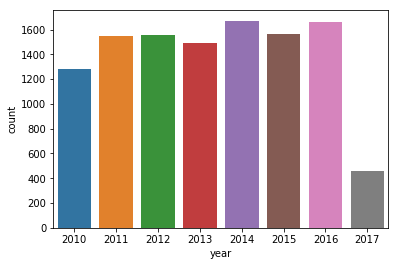

In [53]:
sns.countplot(x="year", data=sdf);

The chart shows the number of permits issued each year since 2010. (The year 2017 has significantly fewer permits because the dataset only covers part of 2017.) You can compare the number of permits visually by the size of each bar. Although some fluctuation occurs from year to year, most years had similar permit activity with a slight upward trend. Though small, this increase in permits shows steady growth in construction permits issued.
Using the same function with the arguments `x="month"` and `x="day-of-the-week"`, you can also plot permits by these time denominations.

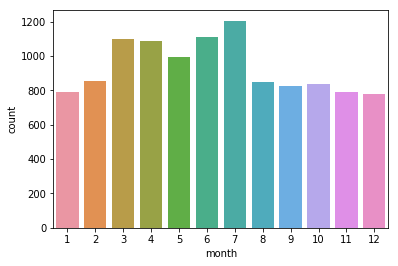

In [44]:
sns.countplot(x="month", data=sdf);

This bar chart changes to show the number of permits issued by month. Based on the chart, the highest permit activity occurs in June and July.

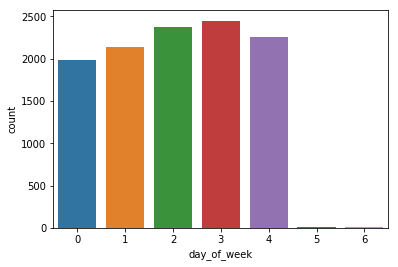

In [45]:
sns.countplot(x="day_of_week", data=sdf);

Almost all permit activity occurs on weekdays, especially Wednesdays. Government offices are closed on weekends, so few permits are issued then.
It can also be helpful to view the data on a timeline, or a line graph. To view the data continuously, you'll use the `set_index` function with the argument `datetime` to change the index field to the datetime field you created earlier when splitting the **Added_Date** field. You'll then use the `resample` function with the argument `(M)` to plot the permit totals by month.

In [46]:
ddf = sdf.set_index('datetime')

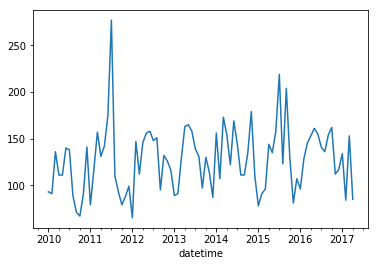

In [47]:
ddf['num'] = 1
ddf['num'].resample('M').sum().plot();

Because you're looking at the data by month, you have a far more granular view. A huge spike in permit activity occurred in mid-2011. What caused this spike? Is it an increase in overall permit activity, or is it mostly an increase in a certain type of permit? You'll plot the number of permits based on Use_Code to find which one cased the spike.

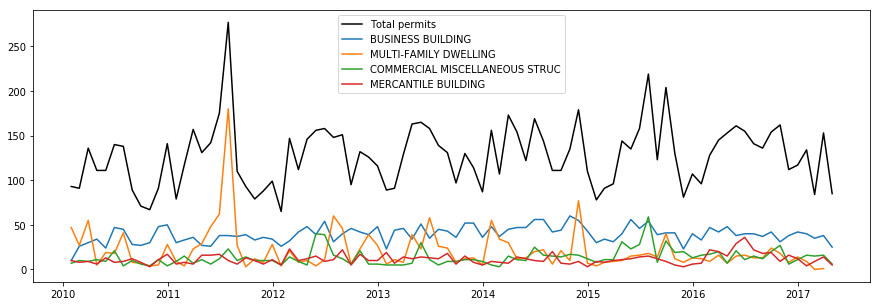

In [54]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(ddf['num'].resample('M').sum(), 'k', label='Total permits')
for use_code in filtered_permits:
    x = ddf[ddf.Use_Code == use_code]['num'].resample('M').sum()
    ax.plot(x, label=use_code)
ax.legend();

Based on the legend, permit activity spiked in 2011 due to a sharp increase in the number of multifamily dwelling permits issued. This likely means that there was large residential growth in 2011.

You've investigated some temporal patterns in your data. Next, you'll look at spatial patterns. Are there certain areas in the county that have experienced a relatively high degree of permit activity? Was the 2011 spike in residential permits in a specific location? To find out, you'll change the symbology of the map card to show hot spots, or areas with concentrations of points.
The `renderer_type='h'` argument plots the data using hotspot symbology.

In [55]:
hotspot_map = agol_gis.map('Germantown, Montgomery County, Maryland')
hotspot_map

MapView(layout=Layout(height='400px', width='100%'))

In [56]:
sdf.spatial.plot(kind='map', map_widget=hotspot_map,
        renderer_type='h', 
        col='Status') 

True

The hot spots show up  where there is a high concentration of permits. The highest concentration areas are in the southeast and northwest corners of the county, which correspond to the major population centers of Germantown and the suburban communities near Washington, D.C.

Next, you'll see if the 2011 permit spike corresponds to a specific area of the map. The code below filters the dataframe to only show permits from 2011 and highlights related data in the map. In this case, the heat map changes to show the hot spot in the northwest part of the county, near Germantown.

In [51]:
hotspot_2011_map = agol_gis.map('Germantown, Montgomery County, Maryland')
hotspot_2011_map

MapView(layout=Layout(height='400px', width='100%'))

In [57]:
sdf[sdf.year==2011].spatial.plot(kind='map', map_widget=hotspot_2011_map,
        renderer_type='h',
        col='Status')  # column to get unique values from

True

In this workflow, you explored permit data for Montgomery County, Maryland. Based on your findings, you can share several visualizations with the city showing historical growth as well as the top issued permit types. You can also suggest when the permit office may be busiest recieving new permits-the spring and summer months, from March through July, show increased permit activity.

This workflow is based on the Learn ArcGIS lesson, [Get Started with Insights for ArcGIS](https://learn.arcgis.com/en/projects/get-started-with-insights-for-arcgis/).